# Python Tutorial for Uber Data

You should install the following packages (through `pip install`) prior to proceeding:
* **matplotlib** (http://matplotlib.org)
* **numpy** (http://www.numpy.org)
* **pandas** (http://pandas.pydata.org)
* **seaborn** (http://seaborn.pydata.org)
* **sklearn** (http://scikit-learn.org/stable/)

Tutorial links (if they exist) are listed above in parentheses next to their respective packages.

Finally, you can get nice geographic maps by installing **basemap**:

`pip install https://github.com/matplotlib/basemap/archive/v1.0.7rel.tar.gz`

If this does not work for you, first install Anaconda by following the instructions in one of the following links:

* https://docs.continuum.io/anaconda/install
* https://conda.io/docs/install/full.html

and then running `conda install basemap`.

The **basemap** package is very sophisticated and has lots of options. Here are some helpful links:

* http://matplotlib.org/basemap/
* http://www.datadependence.com/2016/06/creating-map-visualisations-in-python/
* http://basemaptutorial.readthedocs.io/en/latest/

In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as skl
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Brief tutorial on how to read demographics and green taxi data into pandas dataframes

For faster reads, consider saving these files locally instead of using the web endpoints.

In [2]:
demographics = pd.read_csv("https://s3-us-west-2.amazonaws.com/correlation1-public/s3cr37d@7@s37s/reviews.csv")

In [10]:
demographics['comments'][1]

'Barry was a very pleasant host. Everytime we had a question, he would reply asap.\r\n\r\nWe had everything we needed in the studio, including lining and towels. The location was very convenient, 20 minutes walk from Centraal Station, and several trams were available. Plus, the Zeeburg P+R parking was 10 minutes drive from the studio.\r\n\r\nWe really enjoyed our stay, and we would definitely recommend this place, because of the location, the indoor space, and most importantly because of Barry and Robert kindness and patience !'

In [4]:
demographics[demographics.borough=="Manhattan"]

,nta_name,borough,nta_code,population,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,...,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income
7,Battery Park City-Lower Manhattan,Manhattan,MN25,39699,2272,1055,691,1453,5203,7559,...,800,609,960,1909,2416,3878,2377,6650,125434,185275
28,Central Harlem North-Polo Grounds,Manhattan,MN03,75282,4762,4478,4658,5569,6248,6490,...,4387,3855,4489,5414,2715,2139,807,1133,34413,52748
29,Central Harlem South,Manhattan,MN11,43383,2686,2449,2391,2622,3416,4197,...,1782,1658,2077,2925,1494,2331,1168,1378,48366,78612
31,Chinatown,Manhattan,MN27,47844,1807,1802,1792,2049,4088,5091,...,2849,1399,1841,2430,1661,1585,630,940,35908,62270
33,Clinton,Manhattan,MN15,45884,1299,851,771,1103,4384,7093,...,1728,2171,2099,3405,2827,4001,1859,3658,73591,106168
49,East Harlem North,Manhattan,MN34,58019,3727,3662,3998,4794,5150,4947,...,3323,2463,2926,2799,1533,1078,628,445,26099,43684
50,East Harlem South,Manhattan,MN33,57902,3288,3231,3302,4308,5274,5601,...,2744,2455,2818,3043,1566,2042,733,1437,35857,70668
54,East Village,Manhattan,MN22,44136,862,617,598,3259,7381,7720,...,2072,1524,1702,3160,3057,3201,2155,2478,72665,100130
72,Gramercy,Manhattan,MN21,27988,708,445,380,1794,3626,4811,...,715,587,894,2044,1810,2325,2049,3041,100900,148602
78,Hamilton Heights,Manhattan,MN04,48520,2668,2388,2523,3232,4776,5219,...,2225,2117,2335,2852,1940,1714,524,650,39019,58015


In [ ]:
trips = pd.read_csv("https://s3-us-west-2.amazonaws.com/correlation1-public/CMUDatathon2017/green_trips.csv.gz", compression='gzip')

In [6]:
trips.head()

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,total_amount
0,2014-04-01 00:00:00,2014-04-01 14:24:20,0.0,0.0,0.000000,0.000000,1,7.45,23.5
1,2014-04-01 00:00:00,2014-04-01 17:21:33,0.0,0.0,-73.987663,40.780872,1,8.95,32.5
2,2014-04-01 00:00:00,2014-04-01 15:06:18,0.0,0.0,-73.946922,40.831764,1,1.32,7.0
3,2014-04-01 00:00:00,2014-04-01 08:09:27,0.0,0.0,-73.947670,40.808651,5,0.10,3.5
4,2014-04-01 00:00:00,2014-04-01 16:15:13,0.0,0.0,0.000000,0.000000,1,7.09,28.7


### Demonstration plot: What does the distribution of the number of passengers in green taxi trips look like?

We will produce a plot of this by grouping the green taxi data by passenger_count, and then applying the aggregation function count().

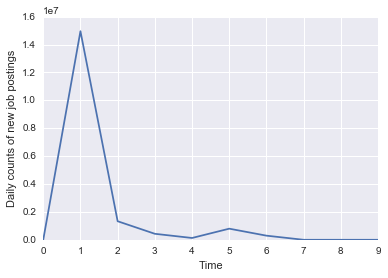

In [7]:
ax = trips.groupby('passenger_count')['pickup_datetime'].count().plot()
ax.set_xlabel('Time')
ax.set_ylabel('Daily counts of new job postings')